In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Clothing.csv")

In [3]:
df.head()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [9]:
#picking variables
df=df[["tsales","margin","nown","inv1","inv2","ssize","start"]]
df.head()

,tsales,margin,nown,inv1,inv2,ssize,start
0,750000,41.0,1.0,17166.67,27177.04,170,41.0
1,1926395,39.0,2.0,17166.67,27177.04,450,39.0
2,1250000,40.0,1.0,292857.20,71570.55,300,40.0
3,694227,40.0,1.0,22207.04,15000.00,260,40.0
4,750000,44.0,2.0,22207.04,10000.00,50,44.0


# Data Analysis

In [10]:
df.describe()

,tsales,margin,nown,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,38.774230,1.283796,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,5.218184,0.639773,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,16.000000,1.000000,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,37.000000,1.000000,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,39.000000,1.000000,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,41.000000,1.295225,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,66.000000,10.000000,1.500000e+06,400000.000000,1214.000000,90.000000


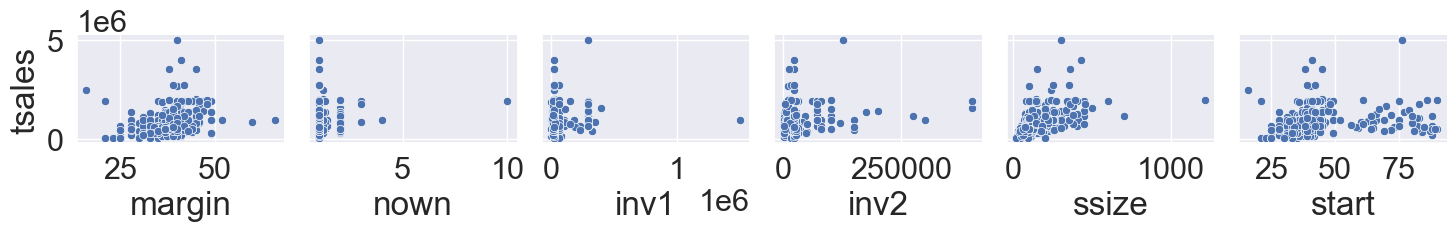

In [15]:
sns.set(font_scale=2)
sns.pairplot(data=df,
             y_vars=["tsales"],
             x_vars=["margin","nown","inv1","inv2","ssize","start"]
             )

<Axes: >

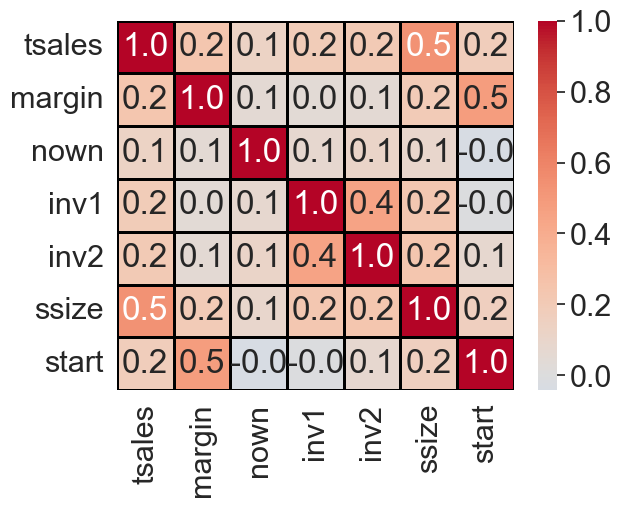

In [32]:
sns.heatmap(df.corr(),
            annot=True,
            fmt=".1f",
            cmap="coolwarm",
            linewidths=1,
            linecolor="black",
            center=0)

# Multilinear Regression prep

In [34]:
y=df.tsales
X=df.drop(columns="tsales")
X=sm.add_constant(X)

In [35]:
X.head(1)

,const,margin,nown,inv1,inv2,ssize,start
0,1.0,41.0,1.0,17166.67,27177.04,170,41.0


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.2,
                                              random_state=1502)
X_train.head(1)

,const,margin,nown,inv1,inv2,ssize,start
201,1.0,42.0,3.0,22207.04,400000.0,400,42.0


# Multinear Regression

In [37]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     23.57
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           5.64e-23
Time:                        13:12:54   Log-Likelihood:                -4635.1
No. Observations:                 320   AIC:                             9284.
Df Residuals:                     313   BIC:                             9311.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.749e+05   2.07e+05     -0.843      0.4

# Accuracy assessment

In [38]:
predictions = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:",round(mean_absolute_error(y_test,predictions),0))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,predictions)),0))

MAE: 346930.0
RMSE: 529018.0
